In [1]:
## Current goal
## -- figure out how the datasets are connected

import pandas as pd

df = pd.read_csv('data.csv')
df_artist = pd.read_csv('data_by_artist.csv')
df_genres = pd.read_csv('data_by_genres.csv')
df_year = pd.read_csv('data_by_year.csv')
df_w_genres = pd.read_csv('data_w_genres.csv')



print("Dataframe -- combined")
print(df.info())
print("\n\n\n\n")
print("Dataframe -- artist")
print(df_artist.info())
print("\n\n\n\n")
print("Dataframe -- genres")
print(df_genres.info())
print("\n\n\n\n")
print("Dataframe -- year")
print(df_year.info())
print("\n\n\n\n")
print("Dataframe -- with genres")
print(df_w_genres.info())
print("\n\n\n\n")

Dataframe -- combined
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16

# let's first explore the artist dataset

In [2]:
df_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


Interesting features. Acousticness, energy, instrumentalness, liveliness -- quite interesting. So what are some of loudest bands? I remember having a discussion with a friend in my undergrad about the loudest band in the world. He said it was "The Who." Is it still true?


In [3]:
df_artist_sorted_loudness = df_artist.sort_values(by=['loudness'], ascending=False)

### Okay, let's just extract the top 10. 

In [4]:
df_artist_sorted_loudness['artists'].head(10)

22600                              Simian
24465               The Calypso Orchestra
9098                         Gerald Clark
20364                       Ramesh Yaduan
5309     Cyril Blake's Calypso Serenaders
1780                           Atmozfears
6109                           Demi Kanon
7522                             Endymion
2237                         Bass Chaserz
25228                           The Moors
Name: artists, dtype: object

In [5]:
# Who are the most popular?
df_artist.sort_values(by=['popularity'], ascending=False)['artists'].head(10)

20966        Ritt Momney
14354          Lele Pons
15070    Los Legendarios
11764           Jerry Di
28263        salem ilese
23687          Surf Mesa
7463              Emilee
213                  A7S
26318               Towy
16453          Master KG
Name: artists, dtype: object

### Don't know any of them. What's wrong? Lets's drop the fancy coding, and check manually. 

In [6]:
df_artist.sort_values(by=['popularity'], ascending=False)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
20966,0,2,0.056300,Ritt Momney,0.399000,210463.000000,0.491000,0.000890,0.110000,-10.778000,0.053800,91.066000,0.1510,93.0,6
14354,1,1,0.090700,Lele Pons,0.905000,155825.000000,0.686000,0.000000,0.266000,-3.152000,0.066400,103.013000,0.9630,92.0,0
15070,0,2,0.310000,Los Legendarios,0.823000,213314.000000,0.821000,0.000004,0.143000,-3.402000,0.166000,99.999000,0.7910,90.0,8
11764,1,2,0.819000,Jerry Di,0.854000,197587.000000,0.525000,0.000000,0.146000,-4.426000,0.214000,97.054000,0.6300,89.0,1
28263,1,2,0.424000,salem ilese,0.738000,136839.000000,0.621000,0.000007,0.692000,-7.313000,0.048600,113.968000,0.7150,88.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22856,1,7,0.765429,Snehal Bhatkar,0.426571,173225.857143,0.470143,0.001049,0.286814,-10.289286,0.135629,83.211286,0.5410,0.0,2
22855,1,8,0.355000,Sneeky Dee,0.732500,204770.000000,0.774500,0.000004,0.226525,-6.356750,0.276750,111.939500,0.6805,0.0,7
10092,1,2,0.935000,Harry Wass,0.544000,328627.000000,0.230000,0.000000,0.711000,-25.765000,0.890000,101.340000,0.4010,0.0,2
10093,1,4,0.994500,Harsukh Kikani,0.703500,182901.000000,0.259500,0.419500,0.114000,-8.943000,0.544000,120.519500,0.7370,0.0,11


### Nothing wrong with what I did. This frame is sorted by popularity and the artist names match. Either I am totally unaware of the current music scene, or the way Spotify calculates popularity is strange. 

### Now let's take a look at the Genres dataset.


In [7]:
df_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [8]:
df_genres.sort_values(by=['instrumentalness'], ascending=False)['genres'].head(10)

2958                                yoga
1854                     musica de fondo
2552                                 spa
1784                         mindfulness
2476                        singing bowl
336     brazilian contemporary classical
1675                         lo-fi house
1248                             guzheng
912                dutch classical piano
535              chinese classical piano
Name: genres, dtype: object

### This time it matches with what I expected. Also, need to try Dutch and Chinese classical piano.


### Now, what is that Year dataset?

In [9]:
df_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [10]:
df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [11]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Things have been boring so far. Let's write some code to find artists post 2000. Current goal is to write a function which will accept genre as a parameter and return the top 5 artists in that genre post 2000.

<AxesSubplot:>

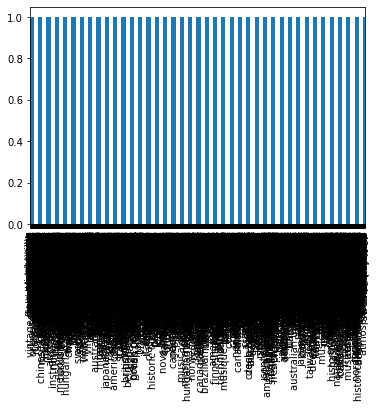

In [48]:
df_genres.genres.value_counts().plot(kind='bar')

# Hard to read. Let's just observe the top 10.

<AxesSubplot:>

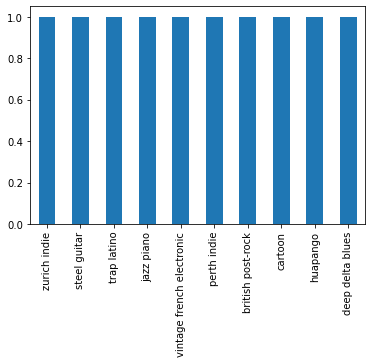

In [50]:
df_temp = df_genres.genres.value_counts()
df_temp.head(10).plot(kind='bar')